In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
from struct import unpack

In [17]:
def loadmnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

In [19]:
test_x,  test_y= loadmnist('dataset/t10k-images-idx3-ubyte', 'dataset/t10k-labels-idx1-ubyte')
train_x, train_y = loadmnist('dataset/train-images-idx3-ubyte', 'dataset/train-labels-idx1-ubyte')

In [21]:
train_x.shape

(60000, 784)

In [22]:
test_x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [23]:
test_y

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

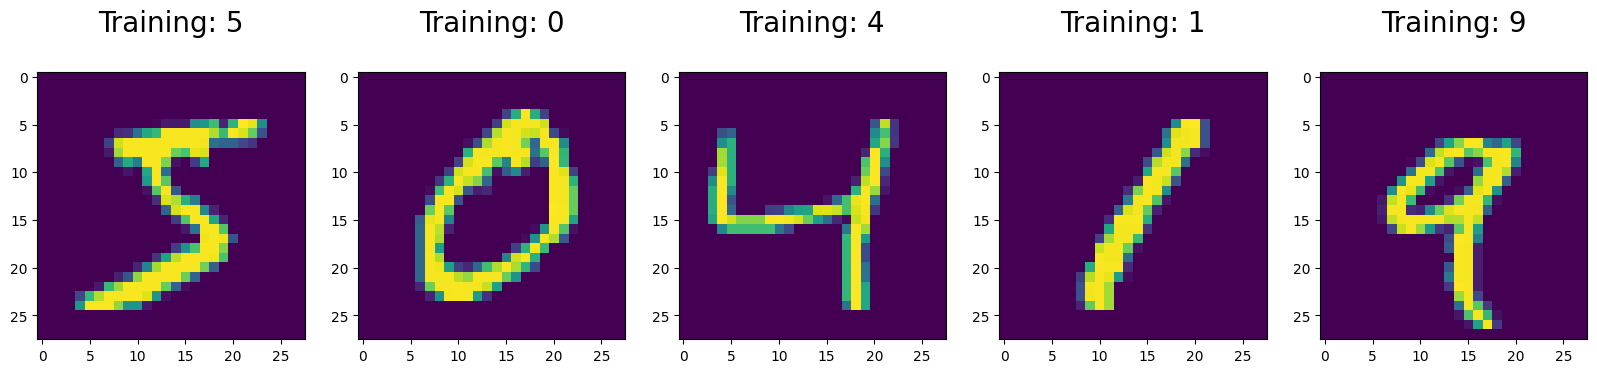

In [24]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_x[0:5], train_y[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)))
    plt.title('Training: %i\n' % label, fontsize = 20)

In [26]:
zero_train_indices = np.where(train_y == 0)
six_train_indices = np.where(train_y == 6)
train_indices = np.concatenate((zero_train_indices[0], six_train_indices[0]))

zero_test_indices = np.where(test_y == 0)
six_test_indices = np.where(test_y == 6)
test_indices = np.concatenate((zero_test_indices[0], six_test_indices[0]))

In [30]:
train_indices = np.random.choice(train_indices, size=len(train_indices), replace=False)
test_indices = np.random.choice(test_indices, size=len(test_indices), replace=False)

In [33]:
val_ratio = 0.2

train_indices = train_indices[: int(len(train_indices) * (1 - val_ratio))]
val_indices = train_indices[int(len(train_indices) * (1 - val_ratio)):]

In [34]:
binary_x_train = train_x[train_indices]
binary_x_test = test_x[test_indices]
binary_x_val = train_x[val_indices]

binary_y_val = train_y[val_indices]
binary_y_train = train_y[train_indices]
binary_y_test = test_y[test_indices]

In [35]:
import random

In [36]:
binary_y_train

array([0, 6, 0, ..., 6, 0, 6], dtype=uint8)

Text(0.5, 1.0, 'Training: 6\n')

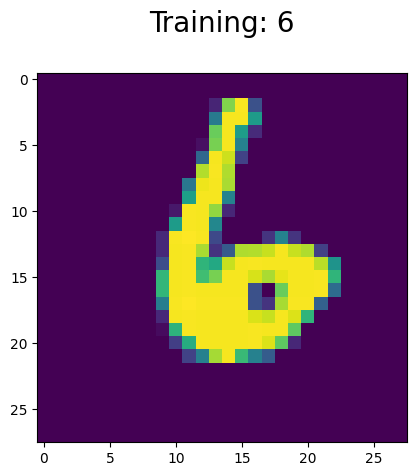

In [37]:
plt.imshow(np.reshape(binary_x_train[1], (28,28)))
plt.title('Training: %i\n' % binary_y_train[1], fontsize = 20)

In [38]:
from collections import Counter

In [39]:
Counter(binary_y_train)

Counter({0: 4745, 6: 4727})

In [40]:
Counter(binary_y_test)

Counter({0: 980, 6: 958})

In [41]:
Counter(binary_y_val)

Counter({6: 954, 0: 941})

## Build Model

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
clf = LogisticRegression(random_state=0, solver='lbfgs')
# L-BFGS-B – Software for Large-scale Bound-constrained Optimization

In [44]:
clf.fit(binary_x_train, binary_y_train)

/home/cheng/miniconda3/envs/chatglm2/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [45]:
clf.coef_

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         2.58693993e-06,  5.66450640e-06,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  3.08027002e-07,
         9.04829317e-07,  5.71077946e-06,  2.21282779e-05,
         5.84977045e-05,  3.46424155e-04,  2.65675471e-03,
         9.18936834e-04,  1.43735267e-03,  4.66481975e-04,
         6.87754625e-04,  1.41291164e-03,  3.19660865e-03,
         1.71671821e-03,  2.71481193e-04,  2.82835409e-04,
         1.65202248e-04,  5.75298270e-05,  3.40249185e-0

In [46]:
clf.intercept_

array([0.00074224])

In [47]:
clf.score(binary_x_train, binary_y_train)

1.0

In [48]:
clf.score(binary_x_val, binary_y_val)

1.0

In [49]:
binary_x_test.shape

(1938, 784)

In [50]:
binary_y_test.shape

(1938,)

In [51]:
clf.score(binary_x_test, binary_y_test)

0.9829721362229102

In [52]:
predicated_result = clf.predict(binary_x_test)

In [53]:
np.where(binary_y_test != predicated_result)

(array([   1,    5,   30,   93,  147,  170,  199,  255,  326,  402,  514,
         552,  583,  625,  699,  813,  830,  889,  980, 1173, 1184, 1192,
        1197, 1315, 1476, 1589, 1651, 1721, 1756, 1884, 1897, 1930, 1932]),)

Text(0.5, 1.0, 'Actual Value: 6 ; Predict Value: 0 \n')

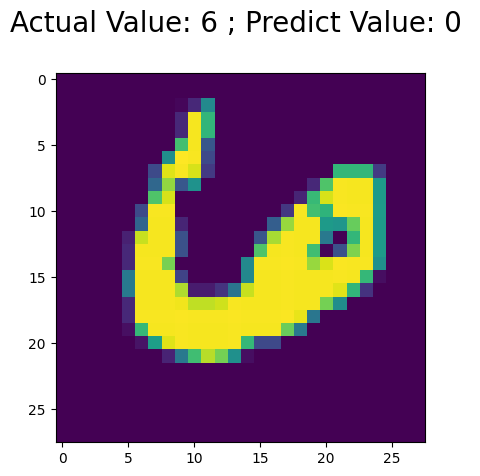

In [77]:
lookup_index = 1721

plt.imshow(np.reshape(binary_x_test[lookup_index], (28,28)))
plt.title('Actual Value: {} ; Predict Value: {} \n'.format(binary_y_test[lookup_index], predicated_result[lookup_index]), fontsize = 20)

In [55]:
from sklearn import metrics

In [56]:
binary_y_test[0]

0

In [57]:
predicated_result[0]

0

In [58]:
metrics.precision_score(binary_y_test, predicated_result, average='macro')

0.9830607706904506

In [59]:
metrics.precision_score(binary_y_test, predicated_result, pos_label=6)

0.9873551106427819

In [60]:
metrics.recall_score(binary_y_test, predicated_result, pos_label=6)

0.9780793319415448

In [61]:
fpr, tpr, threshold = metrics.roc_curve(binary_y_test, predicated_result, pos_label=6)

In [62]:
metrics.auc(fpr, tpr)

0.9829172169911805

In [63]:
cm = metrics.confusion_matrix(binary_y_test, predicated_result)

In [64]:
import seaborn as sn

In [65]:
from sklearn.metrics import confusion_matrix

data = confusion_matrix(binary_y_test, predicated_result)

In [66]:
df_cm = pd.DataFrame(data, columns=np.unique(binary_y_test), index = np.unique(binary_y_test))

# 
# 
# plt.figure(figsize = (10,7))
# sn.set(font_scale=1.4)#for label size
# sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [67]:
df_cm.index.name = 'Actual'

In [68]:
df_cm.columns.name = 'Predicted'

<Axes: xlabel='Predicted', ylabel='Actual'>

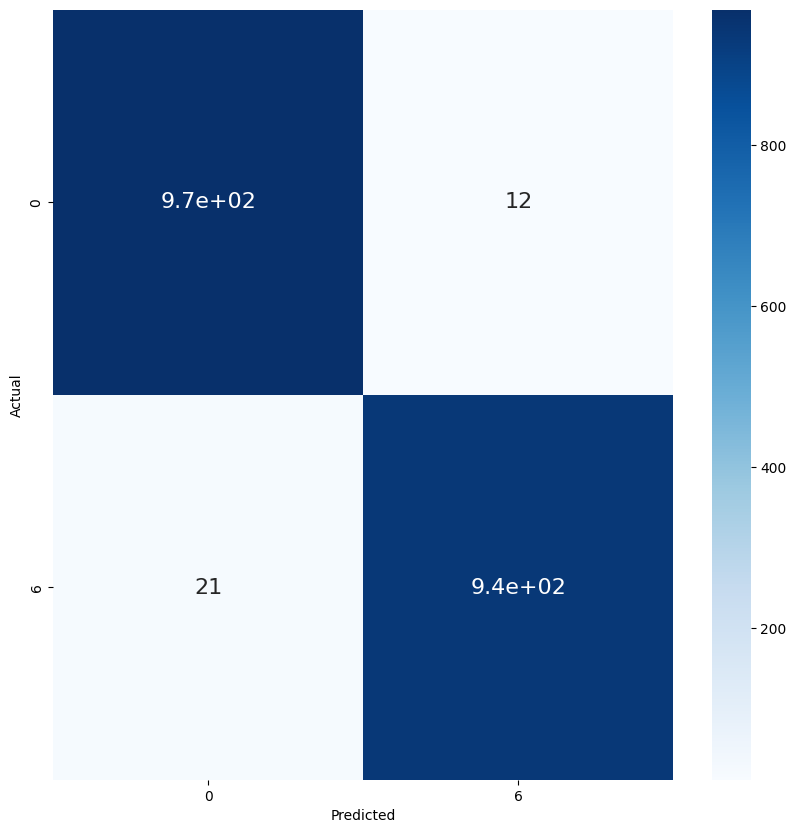

In [69]:
plt.figure(figsize=(10, 10))
sn.heatmap(df_cm, cmap='Blues', annot=True, annot_kws={"size": 16})